# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [14]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

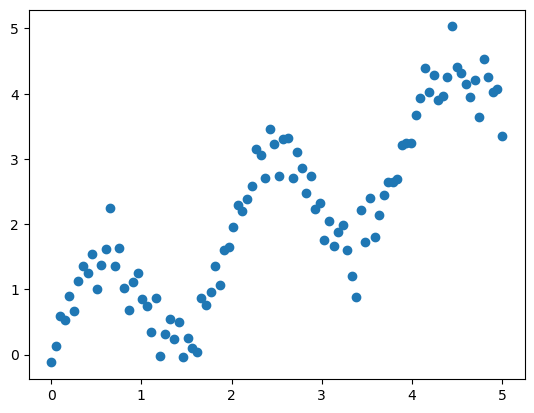

In [15]:
plt.scatter(x,y)

#### nonlinear

In [16]:
regr_lin = LinearRegression()

In [17]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [18]:
regr_lin.fit(X,y)

LinearRegression()

0.5637518412194684


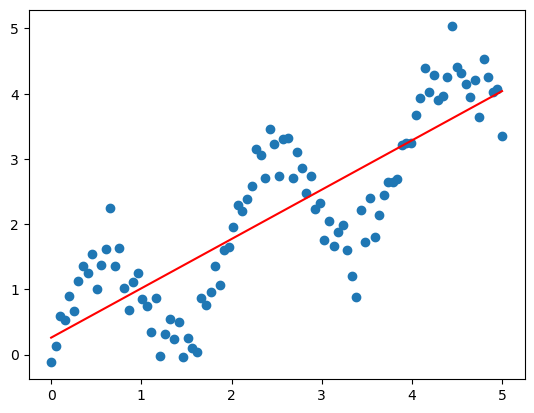

In [19]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [20]:
print(x.shape)

(100,)


In [25]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [26]:
regr_poly = LinearRegression()

In [27]:
regr_poly.fit(X_poly, y)

LinearRegression()

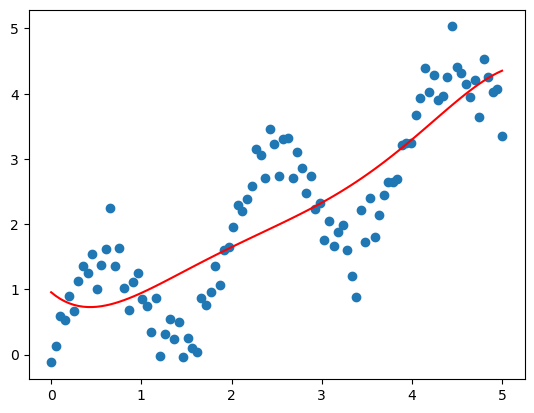

In [33]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')



In [29]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.18117159  1.84421028 -0.83335766  0.17221412 -0.01288569]
interception:  0.956327142167344


In [30]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.95632714, 0.90126991, 0.85499236, 0.81689005, 0.7863844 ,
       0.76292222, 0.74597515, 0.73503921, 0.72963423, 0.72930341,
       0.73361275, 0.74215059, 0.75452706, 0.77037361, 0.78934247,
       0.81110617, 0.83535701, 0.86180655, 0.89018514, 0.92024135,
       0.95174152, 0.98446923, 1.01822477, 1.05282466, 1.08810113,
       1.12390163, 1.16008829, 1.19653744, 1.23313907, 1.26979638,
       1.3064252 , 1.34295353, 1.37932103, 1.41547846, 1.45138727,
       1.48701899, 1.52235477, 1.5573849 , 1.59210822, 1.62653171,
       1.6606699 , 1.69454442, 1.72818344, 1.7616212 , 1.79489751,
       1.82805719, 1.86114962, 1.8942282 , 1.92734984, 1.96057447,
       1.99396452, 2.02758441, 2.06150004, 2.09577832, 2.13048658,
       2.16569216, 2.20146181, 2.23786126, 2.27495466, 2.3128041 ,
       2.35146908, 2.39100601, 2.43146772, 2.47290292, 2.51535573,
       2.55886513, 2.60346448, 2.649181  , 2.69603528, 2.74404074,
       2.79320315, 2.8435201 , 2.89498054, 2.94756418, 3.00124

In [34]:
Y = regr_poly.predict(X_poly)
mse = np.sum((Y-y)**2) / len(y)
print(mse)

0.5238470956844109


#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [35]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [36]:
sigma = 0.3

In [38]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [39]:
regr_rbf = LinearRegression()

In [40]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

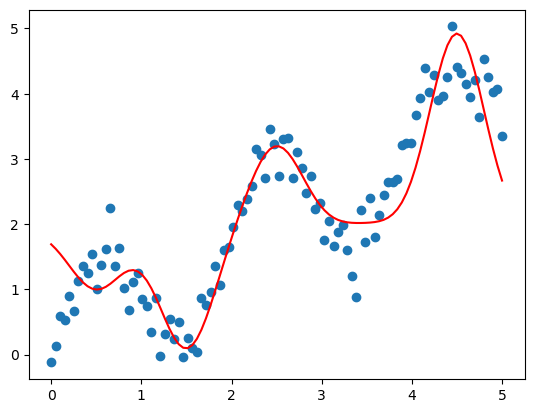

In [41]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [42]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.91413507 -1.82484634  1.28340911  0.0851065   3.00271223]
interception:  1.9193745532344295


#### Comparison

In [43]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

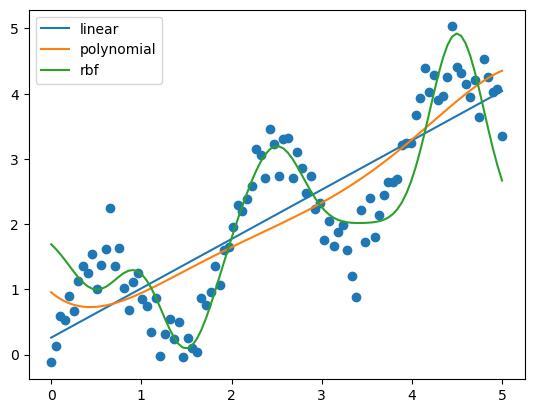

In [44]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [45]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5637518412194684


In [46]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5238470956844109


In [47]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2797468521794335
